In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

import cv2
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, LSTM, TimeDistributed
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adadelta

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/training_data"
test_path = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/testing_data"

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=20, shuffle=False)

Found 57 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [4]:
len(train_batches)

3

In [5]:
len(test_batches)

2

In [6]:
# DATA IS ALMOST BALANCED
print(len(train_batches.classes[train_batches.classes == 0]))
print(len(train_batches.classes[train_batches.classes == 1]))

32
25


# MODEL BUILDING

**1. CNN (CONVOLUTIONAL NEURAL NETWORK)**

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [8]:
model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(128, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(180, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')
])
# model1 = Sequential([
#     data_augmentation,
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(2, activation='softmax'),
# ])

# model1 = Sequential()
# model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
# model1.add(MaxPooling2D())
# model1.add(Conv2D(32, (3,3), 1, activation='relu'))
# model1.add(MaxPooling2D())
# model1.add(Conv2D(16, (3,3), 1, activation='relu'))
# model1.add(MaxPooling2D())
# model1.add(Flatten())
# model1.add(Dense(256, activation='relu'))
# model1.add(Dense(1, activation='sigmoid'))

# model1 = Sequential()
# model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model1.add(Flatten())
# model1.add(Dense(128,activation='relu'))
# model1.add(Dropout(0.1))
# model1.add(Dense(64,activation='relu'))
# model1.add(Dropout(0.1))
# # model1.add(Dense(2,activation='sigmoid'))
# model1.add(Dense(2, activation="softmax"))


In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)       

In [10]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/cnn-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience=15, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [11]:
# Model Compilation
model1.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES
hist1 = model1.fit(train_batches, validation_data = test_batches, shuffle = True, batch_size = 12 , epochs = 200, callbacks=callback_list)

Epoch 1/200
3/3 [==============================] - 6s 816ms/step - loss: 49.7012 - accuracy: 0.4561 - val_loss: 1.2931 - val_accuracy: 0.8065

Epoch 00001: val_accuracy improved from -inf to 0.80645, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\cnn-01-0.81.h5
Epoch 2/200
3/3 [==============================] - 1s 251ms/step - loss: 2.8434 - accuracy: 0.3860 - val_loss: 2.0191 - val_accuracy: 0.1935

Epoch 00002: val_accuracy did not improve from 0.80645
Epoch 3/200
3/3 [==============================] - 1s 240ms/step - loss: 0.8317 - accuracy: 0.6316 - val_loss: 0.4723 - val_accuracy: 0.8065

Epoch 00003: val_accuracy did not improve from 0.80645
Epoch 4/200
3/3 [==============================] - 1s 281ms/step - loss: 0.7619 - accuracy: 0.5614 - val_loss: 0.6434 - val_accuracy: 0.8065

Epoch 00004: val_accuracy did not improve from 0.80645
Epoch 5/200
3/3 [==============================] - 1s 297ms/step - loss: 0.6925 - accuracy: 0.5088 - 

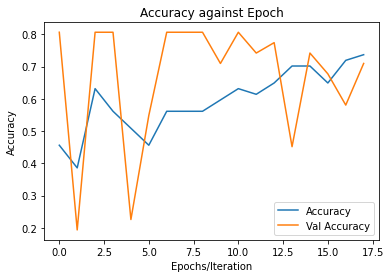

In [13]:
plt.plot(hist1.history["accuracy"], label = "Accuracy")
plt.plot(hist1.history["val_accuracy"], label = "Val Accuracy")

plt.title("Accuracy against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

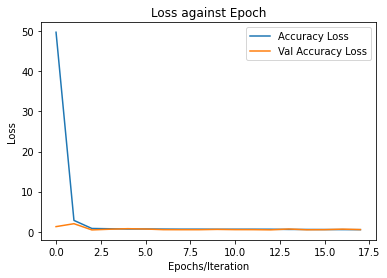

In [14]:
plt.plot(hist1.history["loss"], label = "Accuracy Loss")
plt.plot(hist1.history["val_loss"], label = "Val Accuracy Loss")

plt.title("Loss against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [15]:
train_batches.class_indices

{'cracked': 0, 'normal': 1}

In [16]:
# PREDECTION OF MODEL ON TEST BATCHES

pred1 = model1.predict(test_batches)
prediction1 = [np.argmax(i) for i in pred1]

In [17]:
score1 = model1.evaluate(test_batches)

2/2 [==============================] - 0s 93ms/step - loss: 0.5541 - accuracy: 0.7097


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19  6]
 [ 3  3]]


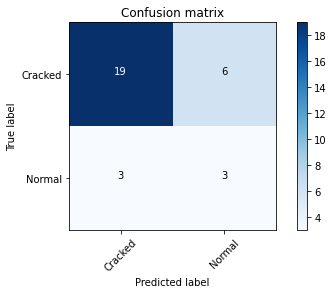

In [19]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = prediction1)
plot_confusion_matrix(cm = cm, classes = ["Cracked","Normal"])

In [20]:
# PRECISION
precision_score(test_batches.classes, prediction1)*100

33.33333333333333

In [21]:
# RECALL
recall_score(test_batches.classes, prediction1)*100

50.0

In [22]:
# F1 SCORE
f1_score(test_batches.classes, prediction1)*100

40.0

In [23]:
print(classification_report(test_batches.classes, prediction1, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support

     Cracked       0.86      0.76      0.81        25
      Normal       0.33      0.50      0.40         6

    accuracy                           0.71        31
   macro avg       0.60      0.63      0.60        31
weighted avg       0.76      0.71      0.73        31



In [24]:
# train_pred1 = model1.predict(train_batches)
# train_prediction1 = [np.argmax(i) for i in train_pred1]
# accuracy_score(train_batches.classes, train_prediction1)*100   #Underfit

**2. VGG16**

In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)
    
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(units=2, activation="softmax"))

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/vgg16weights-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience=15, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [30]:
# MODEL COMPILATION
model2.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES

hist2 = model2.fit(x = train_batches, validation_data = test_batches, shuffle = True, batch_size = 32 , epochs=200, callbacks=callback_list)

Epoch 1/200
3/3 [==============================] - 12s 4s/step - loss: 1.1152 - accuracy: 0.4912 - val_loss: 0.5241 - val_accuracy: 0.7097

Epoch 00001: val_accuracy improved from -inf to 0.70968, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\vgg16weights-01-0.71.h5
Epoch 2/200
3/3 [==============================] - 1s 423ms/step - loss: 0.2857 - accuracy: 0.8772 - val_loss: 0.5134 - val_accuracy: 0.8065

Epoch 00002: val_accuracy improved from 0.70968 to 0.80645, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\vgg16weights-02-0.81.h5
Epoch 3/200
3/3 [==============================] - 1s 416ms/step - loss: 0.1170 - accuracy: 0.9298 - val_loss: 0.4422 - val_accuracy: 0.7742

Epoch 00003: val_accuracy did not improve from 0.80645
Epoch 4/200
3/3 [==============================] - 1s 417ms/step - loss: 0.0630 - accuracy: 0.9825 - val_loss: 0.5085 - val_accuracy: 0.8065

Epoch 00004: val_accuracy di

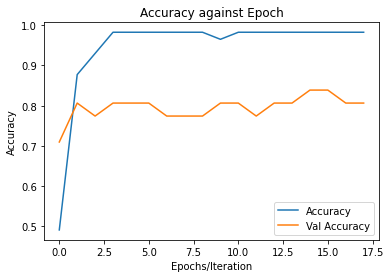

In [32]:
plt.plot(hist2.history["accuracy"], label = "Accuracy")
plt.plot(hist2.history["val_accuracy"], label = "Val Accuracy")

plt.title("Accuracy against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

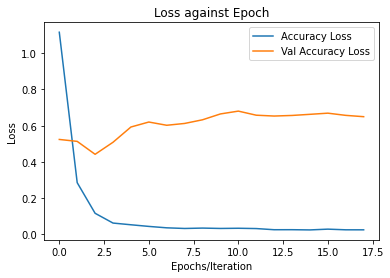

In [33]:
plt.plot(hist2.history["loss"], label = "Accuracy Loss")
plt.plot(hist2.history["val_loss"], label = "Val Accuracy Loss")

plt.title("Loss against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [34]:
score2 = model2.evaluate(test_batches)

2/2 [==============================] - 0s 123ms/step - loss: 0.6496 - accuracy: 0.8065


In [35]:
# PREDECTION OF MODEL ON TEST BATCHES

pred2 = model2.predict(test_batches)
prediction2 = [np.argmax(i) for i in pred2]

Confusion matrix, without normalization
[[19  6]
 [ 3  3]]


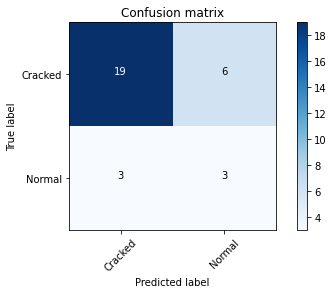

In [36]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = prediction1)
plot_confusion_matrix(cm = cm, classes = ["Cracked","Normal"])

In [37]:
# PRECISION
precision_score(test_batches.classes, prediction2)*100

50.0

In [38]:
# RECALL
recall_score(test_batches.classes, prediction2)*100

83.33333333333334

In [39]:
# F1 SCORE
f1_score(test_batches.classes, prediction2)*100

62.5

In [40]:
print(classification_report(test_batches.classes, prediction2, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support

     Cracked       0.95      0.80      0.87        25
      Normal       0.50      0.83      0.62         6

    accuracy                           0.81        31
   macro avg       0.73      0.82      0.75        31
weighted avg       0.86      0.81      0.82        31



In [41]:
# PREDECTION OF MODEL ON TRAIN BATCHES

train_pred2 = model2.predict(train_batches)
train_prediction2 = [np.argmax(i) for i in train_pred2]
accuracy_score(train_batches.classes, train_prediction2)*100   #Underfit

45.614035087719294

**3. RESNET50**

In [42]:
pretrained_model = ResNet50(input_shape = (224,224, 3), include_top = False, weights = 'imagenet', pooling = 'max')
pretrained_model.trainable = False

inputs = pretrained_model.input

x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x) # Adding some custom layers of our choice

outputs = Dense(2, activation='sigmoid')(x)
#output choice
model3 = Model(inputs=inputs, outputs=outputs)

In [43]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [44]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/resnetweights-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience = 15, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [45]:
# MODEL COMPILATION
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES
hist3 = model3.fit(train_batches, validation_data = test_batches, shuffle = True, batch_size = 32 , epochs = 150, callbacks=callback_list)

Epoch 1/150
3/3 [==============================] - 9s 2s/step - loss: 2.1427 - accuracy: 0.6140 - val_loss: 0.5438 - val_accuracy: 0.8710

Epoch 00001: val_accuracy improved from -inf to 0.87097, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\resnetweights-01-0.87.h5
Epoch 2/150
3/3 [==============================] - 2s 596ms/step - loss: 0.5667 - accuracy: 0.7895 - val_loss: 0.3264 - val_accuracy: 0.8710

Epoch 00002: val_accuracy did not improve from 0.87097
Epoch 3/150
3/3 [==============================] - 1s 267ms/step - loss: 0.0840 - accuracy: 0.9825 - val_loss: 0.2338 - val_accuracy: 0.8710

Epoch 00003: val_accuracy did not improve from 0.87097
Epoch 4/150
3/3 [==============================] - 1s 314ms/step - loss: 0.0811 - accuracy: 0.9825 - val_loss: 0.2608 - val_accuracy: 0.9032

Epoch 00004: val_accuracy improved from 0.87097 to 0.90323, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/mode

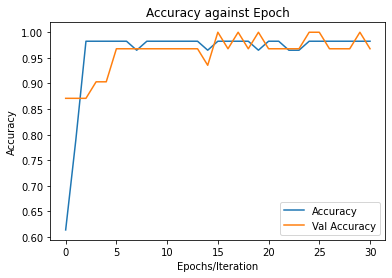

In [47]:
plt.plot(hist3.history["accuracy"], label = "Accuracy")
plt.plot(hist3.history["val_accuracy"], label = "Val Accuracy")

plt.title("Accuracy against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

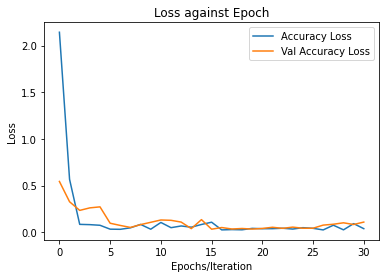

In [48]:
plt.plot(hist3.history["loss"], label = "Accuracy Loss")
plt.plot(hist3.history["val_loss"], label = "Val Accuracy Loss")

plt.title("Loss against Epoch")
plt.xlabel("Epochs/Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [49]:
score3 = model3.evaluate(test_batches)

2/2 [==============================] - 0s 74ms/step - loss: 0.1085 - accuracy: 0.9677


In [50]:
# PREDECTION OF MODEL ON TEST BATCHES

pred3 = model3.predict(test_batches)
prediction3 = [np.argmax(i) for i in pred3]

Confusion matrix, without normalization
[[20  5]
 [ 1  5]]


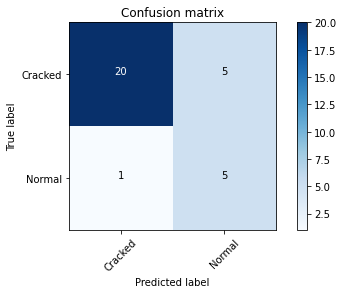

In [51]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = prediction2)
plot_confusion_matrix(cm = cm, classes = ["Cracked","Normal"])

In [52]:
# PRECISION
precision_score(test_batches.classes, prediction3)*100

100.0

In [53]:
# RECALL
recall_score(test_batches.classes, prediction3)*100

83.33333333333334

In [54]:
# F1 SCORE
f1_score(test_batches.classes, prediction3)*100

90.9090909090909

In [55]:
print(classification_report(test_batches.classes, prediction3, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support

     Cracked       0.96      1.00      0.98        25
      Normal       1.00      0.83      0.91         6

    accuracy                           0.97        31
   macro avg       0.98      0.92      0.94        31
weighted avg       0.97      0.97      0.97        31



In [56]:
# PREDECTION OF MODEL ON TRAIN BATCHES

train_pred3 = model3.predict(train_batches)
train_prediction3 = [np.argmax(i) for i in train_pred3]
accuracy_score(train_batches.classes, train_prediction3)*100   #Underfit

49.122807017543856

# Testing Trained Model

In [8]:
final_model = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/Final_Deep_Learning_Model.h5")

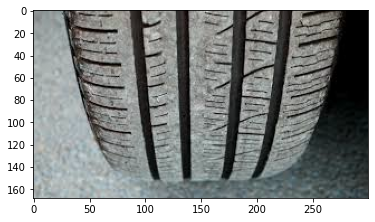

Lies between 0% - 40% range.
Good Health, Good to Go.


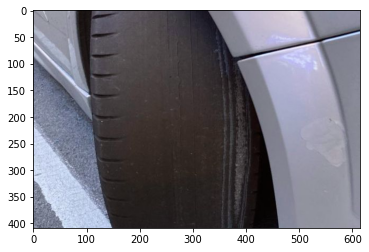

Lies between 70% - 100% range.
Alert, Urgent Replacement...!


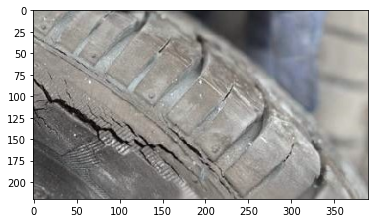

Lies between 40% - 70% range.
Better, Will Need Replacement in Future.....!


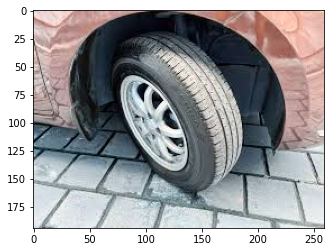

Lies between 40% - 70% range.
Better, Will Need Replacement in Future.....!


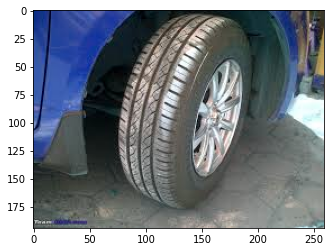

Lies between 0% - 40% range.
Good Health, Good to Go.


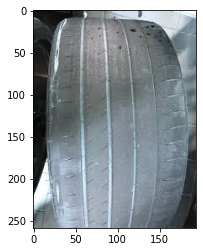

Lies between 40% - 70% range.
Better, Will Need Replacement in Future.....!


In [11]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = final_model.predict(np.expand_dims(resize/255,0))
    result_per = round(pred[0][0]*100, 2)
    
    if result_per <= 55:
        print("Lies between 0% - 40% range.")
        print("Good Health, Good to Go.")
    elif result_per > 55 and result_per <= 61:
        print("Lies between 40% - 70% range.")
        print("Better, Will Need Replacement in Future.....!")
    else:
        print("Lies between 70% - 100% range.")
        print("Alert, Urgent Replacement...!")
        
#     print("Probabilities of each Class:", pred[0])
#     y_classes = np.argmax(pred)
#     if y_classes == 0:
#         print("Cracked")
#     else:
#         print("Normal")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/SampleNew1.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/CrackedSample2.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/CrackedSample1.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/SampleNew3.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/SampleNew2.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/Samples/CrackedSample3.jpg")

In [3]:
# mod = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/cnn-28-0.94.h5")

In [4]:
# cnn_best = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/cnn-22-0.93.h5")
# vgg16_best = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/vgg16weights-17-0.86.h5")
# resnet_best = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/resnetweights-11-0.91.h5")

In [ ]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = mod.predict(np.expand_dims(resize/255,0))
    print("Probabilities of each Class:",pred[0])
    y_classes = np.argmax(pred)
    print(pred)
    print(y_classes)
#     if y_classes == 0:
#         print("The Tire is Cracked and Need Replacement")
#     else:
#         print("The Tire is Normal and can Sustain Longer")
# predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr4.jpeg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/new3.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr1.jpg")

In [ ]:
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr2.jpg")

In [ ]:
normal - 53.07 , 54.13 , 58.03

cracked - 57.71 , 62.67 , 60.14 , 63.25

98.47 , 98.0 , 97.1



if x <= 55:
    print("Lies between 0% - 40% range,")
    print("Good Health, Good to Go.")
elif x > 55 and x <= 61:
    print("Better, Will Need Replacement in Future.....!")
else:
    print("Alert, Urgent Replacement...!")